# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

age = [17,51,27,21,36,48,19,26,54,30]
tardies = [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({'age': age, 'tardies': tardies})

Draw a dispersion diagram (scatter plot) for the data.

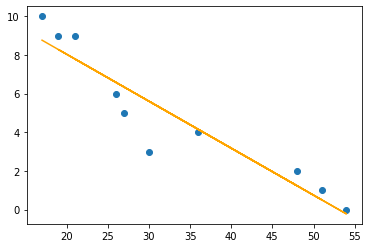

In [3]:
# Your code here.
results = stats.linregress(age,tardies)

regression_line = results[1] + results[0] * np.array(age)

plt.plot(age, regression_line, c="orange")
plt.scatter(age,tardies)

plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [97]:
# Your response here. 
print("We can say that there's a correlation between ages and tardies. The more younger the students are more they are late")

We can say that there's a correlation between ages and tardies. The more younger the students are more they are late


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [19]:
# Your response here.
#correlation:

print(f'The correlation is: ',student_data['age'].corr(student_data['tardies']))

#covariance:

print(f'The covariance is: ',student_data['age'].cov(student_data['tardies']))

The correlation is:  -0.9391626886887122
The covariance is:  -45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [19]:
# Your response here.
# Answer on the plot above

Plot your regression model on your scatter plot.

In [ ]:
# Your code here.
# Answer on the plot above

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# Answer after the plot


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [4]:
# Import any libraries you may need & the data

data = pd.read_csv("C:/Users/TG/Desktop/IronHack_Data/lab-regression-analysis/your-code/vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [5]:
# Your response here. 

print("The most important variable in determining CO2 emissions, is Fuel Barrels/Year")
print("\n")
print("The variable that provides least information for CO2 emissions, is Year")

data2 = data.drop(["Make",                                                
                   "Model",
                   "Engine Displacement",
                   "Transmission",
                   "Drivetrain",
                   "Vehicle Class",
                   "Fuel Type",
                   "City MPG",
                   "Highway MPG"],
                  axis=1)
data2.corr()

#Q1 -> "The most important variable in determining CO2 emissions, is Fuel Barrels/Year"
#Q2 -> "The variable that provides least information for CO2 emissions, is Combined MPG"

The most important variable in determining CO2 emissions, is Fuel Barrels/Year


The variable that provides least information for CO2 emissions, is Year


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [9]:
# Your response here. 

X = data2[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]

#Include the Y intercept -> by default not included

X = sm.add_constant(X)

y = data2["CO2 Emission Grams/Mile"]

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                             18:15:16   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [1]:
# Your response here. 
"""
The most important variables would be Fuel Barrels/Year.

We can conclude that for each unit of Fuel Barrels/Year, the higher Fuel Barrels will on average, have 19 units higher CO2 Emission Grams/Mile.

"""

'\nThe most important variables would be Fuel Barrels/Year and Combined MPG.\n\nWe can conclude that for each unit of CO2 Emission Grams/Mile the Fuel Barrels/Year raise by 19 units.\n'

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [15]:
# Your code here.

X = np.array([1,3,4,6,8,9,11,14])
Y = np.array([1,2,4,4,5,7,8,13])

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

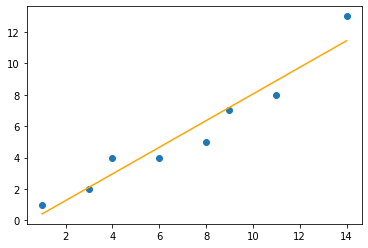

In [16]:
# Your code here.

results = stats.linregress(X,Y)
regression_line = results[1] + results[0]*X

plt.plot(X, regression_line, c="orange")
plt.scatter(X,Y)

plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [17]:
# Your response here. 
print("The RValue is colse to 1, that means we a close to a perfect linear regression")
print("\n")
print(results)

The RValue is colse to 1, that means we a close to a perfect linear regression


LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090685, stderr=0.09380896778286217)


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [18]:
# Your response here. 
"""No, even if I remove the most problematic value (x=8, Y=5), the RValue will slightly raise to 0.975749828986"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [19]:
# Your response here. 
"""See answer above"""